# Imports 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.dates import date2num


# Read CSV functions


In [2]:
#This function takes input from OrdersNLBE table, saved as CSV. 
#Contains all orders placed in 2019. 
def import_and_clean_orders_nlbe_data(filepath):
    df = pd.read_csv(filepath, encoding = 'utf-8')
    df.CustomerId = df.CustomerId.astype(str) 
    df.CustomerMarketPotential = df.CustomerMarketPotential.astype(str)
    df['SalesDocumentHeaderCreationDate'] = pd.to_datetime(df['SalesDocumentHeaderCreationDate'])
    return df

#This function takes input from a manual SQL query, returning a list of customer IDs and their webshop first order date 
def read_first_orders_file(filepath):
    df = pd.read_csv(filepath, encoding = 'utf-8')
    df.CustomerId = df.CustomerId.astype(str) 
    df['FirstOrderDate'] = pd.to_datetime(df['FirstOrderDate'])
    df['Year_of_first_order'] = df['FirstOrderDate'].dt.strftime('%Y')
    return df


# Import data 

In [131]:
df_orders = import_and_clean_orders_nlbe_data(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\2019_webshop_orders_NL.csv")
df_first_order_dates = read_first_orders_file(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\Customer_first_orders_NL.csv")

# Functions for new/existing customer filtering, and summary statistics

In [132]:
#This function filters the first orders df, for customers who placed their first webshop order in given year. 
#It then filters the orders df on the customer IDs of these new customers. 
#Year to be passed as string. 
def filter_orders_for_new_customers(df_first_order_dates, df_orders, year):
    df_new_customer_IDs = df_first_order_dates[df_first_order_dates['Year_of_first_order'] == year]
    df_orders = df_orders[df_orders['CustomerId'].isin(df_new_customer_IDs.CustomerId)]
    return df_orders, df_new_customer_IDs

#This function filters the first orders df, for customers who placed their first webshop order before given year. 
def filter_orders_for_existing_customers(df_first_order_dates, df_orders, year):
    df_existing_customer_IDs = df_first_order_dates[df_first_order_dates['Year_of_first_order'] < year]
    df_orders = df_orders[df_orders['CustomerId'].isin(df_existing_customer_IDs.CustomerId)]
    return df_orders, df_existing_customer_IDs

# This function calculates some summary statistics for the orders df.
def get_statistics_for_orders(df_orders, Title):
    print (Title)
    print ("Number of orderlines: ", len(df_orders))
    print ("Number of customers: ",  df_orders.CustomerId.nunique())
    Total_sales = df_orders.SalesValue.sum().round()
    print ("Total Sales from customers: ", df_orders.SalesValue.sum().round())
    print ("AOLV:", (Total_sales / len(df_orders)).round())
    print ("Revenue per customer:", (Total_sales / df_orders.CustomerId.nunique()).round())
    print ("")

# Split orders df into new and existing customer orders, 2018 customers and get statistics 

In [135]:
df_orders_for_new_customers, df_new_customer_IDs = filter_orders_for_new_customers(df_first_order_dates, df_orders, '2019')
df_orders_for_existing_customers, df_existing_customer_IDs = filter_orders_for_existing_customers(df_first_order_dates, df_orders, '2019')
df_orders_for_2018_customers, df_2018_customer_IDs = filter_orders_for_new_customers(df_first_order_dates, df_orders, '2018')

get_statistics_for_orders(df_orders, 'All Customer Orders in 2019')
get_statistics_for_orders(df_orders_for_new_customers, 'New Customer Orders in 2019')
get_statistics_for_orders(df_orders_for_existing_customers, 'Existing Customer Orders in 2019')

print ("Summary Stats:")
print ("Number of Existing Customers: ", len(df_existing_customer_IDs))
print ("Number of New Customers: ", len(df_new_customer_IDs))
print ("Total Number of Customers (NL, Webshop): ", len(df_first_order_dates))
print ("New + Existing:", len(df_existing_customer_IDs) + len(df_new_customer_IDs))
print ("Total - (New + Existing)",  len(df_first_order_dates) - (len(df_existing_customer_IDs) + len(df_new_customer_IDs)))
print (df_first_order_dates.Year_of_first_order.value_counts())

All Customer Orders in 2019
Number of orderlines:  113363
Number of customers:  7026
Total Sales from customers:  10722560.0
AOLV: 95.0
Revenue per customer: 1526.0

New Customer Orders in 2019
Number of orderlines:  22829
Number of customers:  4291
Total Sales from customers:  2290870.0
AOLV: 100.0
Revenue per customer: 534.0

Existing Customer Orders in 2019
Number of orderlines:  90534
Number of customers:  2735
Total Sales from customers:  8431690.0
AOLV: 93.0
Revenue per customer: 3083.0

Summary Stats:
Number of Existing Customers:  5172
Number of New Customers:  4291
Total Number of Customers (NL, Webshop):  9885
New + Existing: 9463
Total - (New + Existing) 422
2019    4291
2018    2474
2017    1369
2016    1329
2020     422
Name: Year_of_first_order, dtype: int64


# Import 2018 orders data, filter on existing customer IDs, get statistics

In [137]:
df_orders_18 = import_and_clean_orders_nlbe_data(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\2018_webshop_orders_NL.csv")
df_orders_18_filtered = df_orders_18[df_orders_18['CustomerId'].isin(df_orders_for_existing_customers.CustomerId)]
get_statistics_for_orders(df_orders_18_filtered, 'Existing Customer Orders in 2018')


Existing Customer Orders in 2018
Number of orderlines:  74503
Number of customers:  2433
Total Sales from customers:  6284296.0
AOLV: 84.0
Revenue per customer: 2583.0



# Compare Year-on-Year function, run for existing customer base for 2018 vs 2019

In [12]:
def compare_year_on_year(df_orders_year_1, df_orders_year_2):
    Number_Orderlines_Year_1 = len(df_orders_year_1)
    Number_Orderlines_Year_2 = len(df_orders_year_2)
    Number_Customers_Year_1 = df_orders_year_1.CustomerId.nunique()
    Number_Customers_Year_2 = df_orders_year_2.CustomerId.nunique()
    Sales_Value_Year_1 = df_orders_year_1.SalesValue.sum()
    Sales_Value_Year_2 = df_orders_year_2.SalesValue.sum()
    AOLV_Year_1 = df_orders_year_1.SalesValue.sum() / len(df_orders_year_1)
    AOLV_Year_2 = df_orders_year_2.SalesValue.sum() / len(df_orders_year_2)
    Total_sales_year_1 = df_orders_year_1.SalesValue.sum()
    Total_sales_year_2 = df_orders_year_2.SalesValue.sum()

    Revenue_Per_Customer_Year_1 = (Total_sales_year_1 / df_orders_year_1.CustomerId.nunique())
    Revenue_Per_Customer_Year_2 = (Total_sales_year_2 / df_orders_year_2.CustomerId.nunique())

    print ("YoY Orderlines change:", ((Number_Orderlines_Year_2 / Number_Orderlines_Year_1) * 100) - 100, "%")
    print ("YoY Customers change:", ((Number_Customers_Year_2 / Number_Customers_Year_1) * 100) - 100, "%")
    print ("YoY Sales Value change:", ((Sales_Value_Year_2 / Sales_Value_Year_1) * 100) - 100, "%")
    print ("YoY AOLV change:", ((AOLV_Year_2 / AOLV_Year_1) * 100) - 100, "%")
    print ("YoY Revenue Per Customer change:", ((AOLV_Year_2 / AOLV_Year_1) * 100) - 100, "%")



YoY Orderlines change: 21.51725433875147 %
YoY Customers change: 12.412659268392929 %
YoY Sales Value change: 34.170800576747496 %
YoY AOLV change: 10.412962592721172 %
YoY Revenue Per Customer change: 10.412962592721172 %


# Compare 18 vs 19 customer orders, for existing customers as of 2019, who ordered in 18 and 19. 


In [138]:
IDs_of_2018_Existing = df_orders_18_filtered.CustomerId.unique()
df_orders_19_with_Existing_Customers_Active_In_2018 = df_orders[df_orders['CustomerId'].isin(IDs_of_2018_Existing)]
get_statistics_for_orders(df_orders_19_with_Existing_Customers_Active_In_2018, 'Existing Customers, active in 18, orders in 19')
get_statistics_for_orders(df_orders_18_filtered, 'Existing Customer Orders in 2018')
compare_year_on_year(df_orders_18_filtered, df_orders_19_with_Existing_Customers_Active_In_2018)


Existing Customers, active in 18, orders in 19
Number of orderlines:  88672
Number of customers:  2433
Total Sales from customers:  8230477.0
AOLV: 93.0
Revenue per customer: 3383.0

Existing Customer Orders in 2018
Number of orderlines:  74503
Number of customers:  2433
Total Sales from customers:  6284296.0
AOLV: 84.0
Revenue per customer: 2583.0

YoY Orderlines change: 19.018026119753557 %
YoY Customers change: 0.0 %
YoY Sales Value change: 30.968961538664445 %
YoY AOLV change: 10.041281819685082 %
YoY Revenue Per Customer change: 10.041281819685082 %


# Import joined Channel data

In [17]:
df_orders_plus_channel = import_and_clean_orders_nlbe_data(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\2019_channel_webshop_table.csv")


# Divide into new and existing

In [19]:
df_orders_channels_new = df_orders_plus_channel[df_orders_plus_channel['CustomerId'].isin(df_orders_for_new_customers.CustomerId)]
df_orders_channels_existing = df_orders_plus_channel[df_orders_plus_channel['CustomerId'].isin(df_orders_for_existing_customers.CustomerId)]

df_orders_channels_new['Percentage_Sales'] = (df_orders_channels_new['SalesValue'] / df_orders_channels_new.SalesValue.sum() ) * 100
df_orders_channels_existing['Percentage_Sales'] = (df_orders_channels_existing['SalesValue'] / df_orders_channels_existing.SalesValue.sum() ) * 100


# Plot Sales Value by Channel for new customers 

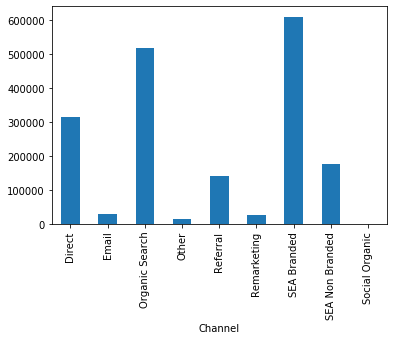

In [139]:
df_orders_channels_new.groupby(['Channel'])['SalesValue'].agg('sum').plot.bar()

# Plot % Sales by Channel 

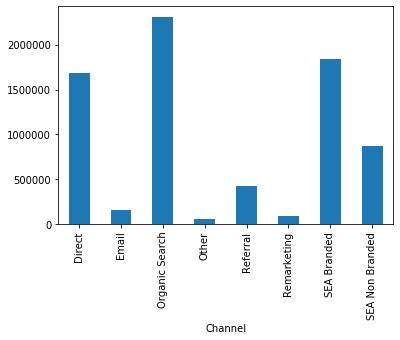

In [142]:
df_orders_channels_new.groupby(['Channel'])['Percentage_Sales'].agg('sum').plot.bar()


# Plot Sales by Channel for existing customers

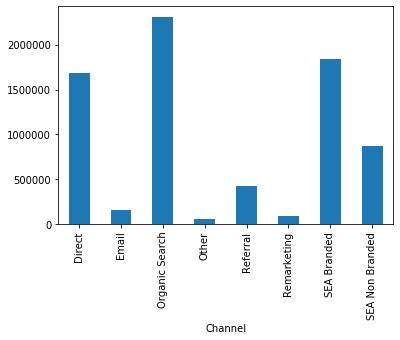

In [23]:
df_orders_channels_existing.groupby(['Channel'])['SalesValue'].agg('sum').plot.bar()

# Plot % Sales for existing

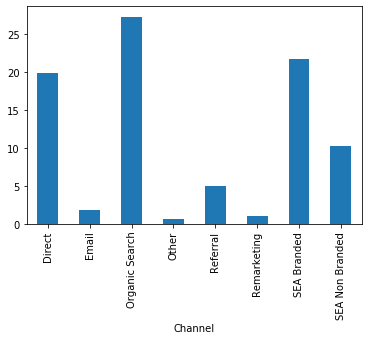

In [24]:
df_orders_channels_existing.groupby(['Channel'])['Percentage_Sales'].agg('sum').plot.bar()

# Create keys for new and existing to plot on same figure

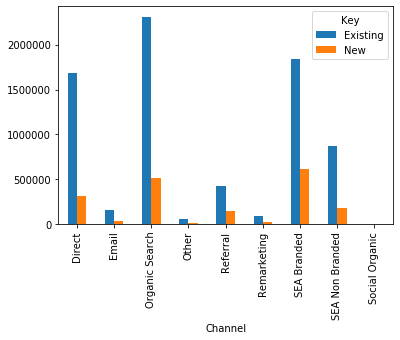

In [144]:
df_orders_channels_new['Key'] = 'New'
df_orders_channels_existing['Key'] = 'Existing'
df_new_and_existing = pd.concat([df_orders_channels_new, df_orders_channels_existing],keys=['New','Existing'])
df_orders_channels_grouped_all = df_new_and_existing.groupby(['Channel', 'Key'])['SalesValue'].agg('sum')
df_plotting = df_orders_channels_grouped_all.unstack('Key').plot(kind = 'bar')

# Plot % Sales for new and existing

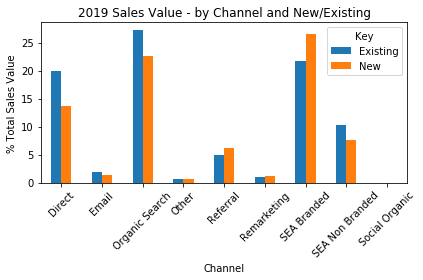

In [233]:
df_orders_channels_grouped_all_2 = df_new_and_existing.groupby(['Channel', 'Key'])['Percentage_Sales'].agg('sum')
ax = df_orders_channels_grouped_all_2.unstack('Key').plot(kind = 'bar')
ax.set_xlabel("Channel")
ax.set_ylabel("% Total Sales Value")
plt.title("2019 Sales Value - by Channel and New/Existing")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(r'C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\Channel_breakdown.png', dpi=600)

Plan:
Join AdSpend and Campaign ID together first, on CampaignId and Date. 
CampaignOrders will probably have multiple entries per date-campaignId pair. This means multiple orders were assigned to Campaigns on a single day. 

Found that there are multiple Channels sometimes for one CampaignId, but when AdSpend grouped by SetDate and CampaignId, only one channel per group. 

Issue:
We want to attach AdSpend to OrdersNLBE, but AdSpend table isn't on order level, it's on campaign level. 

I'd propose just grouping by CampaignID, SetDate, Channel and AdSpend, as Channel and AdSpend are unique for each SetDate and Campaign Id pair (checked). 

But, while this would allow us to get ROAS per channel, we wouldn't then be able to look at ROAS for new vs existing, or by BU etc. 

So we need to join Adspend on CampaignId, by day, and then join that to orders via transaction id and order number (as already done). 

Duplicates check:
90748 - number of rows from count(distinct(OriginalOrderNumber)) on input SQL query.
92183 - number of rows from count(*) on input SQL query.





# Import Adspend, Channel data, joined to Orders

In [148]:
col_names = pd.read_csv(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\Orders_Campaign_Adspend_joined.csv", encoding = 'utf-8', nrows=0).columns
types_dict = {'SalesValue': float, 'AdSpend': float}
types_dict.update({col: str for col in col_names if col not in types_dict})
df_orders_campaigns_adspend = pd.read_csv(r"C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\Orders_Campaign_Adspend_joined.csv", encoding = 'utf-8', dtype=types_dict)
df_orders_campaigns_adspend['SalesDocumentHeaderCreationDate'] = pd.to_datetime(df_orders_campaigns_adspend['SalesDocumentHeaderCreationDate'])

# Group by Date and Campaign ID (Ad Spend unique to campaign), and divide Ad Spend by length of each group (number of orderlines)
#### Incredibly simple attribution model: Ad Spend on a certain day solely responsible for all orderlines on that day. ROAS = Ad Spend / number of orderlines

In [149]:
Adspend_scaling_group_by = df_orders_campaigns_adspend.groupby(['SalesDocumentHeaderCreationDate', 'CampaignId.1']).apply(lambda x: x['AdSpend']/len(x)).rename('AdSpend_Scaled').reset_index()

# Drop duplicates from group by (cast to df), ad spend unique across date-campaign id pairs 

In [151]:
Adspend_scaling_group_by = Adspend_scaling_group_by.drop_duplicates(subset=['SalesDocumentHeaderCreationDate', 'CampaignId.1'], keep='last')

# Join scaled ad spend to orders-campaign-adspend df

In [152]:
df_with_adspend_scaled = pd.merge(df_orders_campaigns_adspend, _,  how='left', left_on=['SalesDocumentHeaderCreationDate','CampaignId.1'], right_on = ['SalesDocumentHeaderCreationDate','CampaignId.1'])

# Divide df into new and existing customers

In [157]:
df_adspend_scaled_new_customers = df_with_adspend_scaled[df_with_adspend_scaled['CustomerId'].isin(df_new_customer_IDs.CustomerId)]
df_adspend_scaled_existing_customers = df_with_adspend_scaled[df_with_adspend_scaled['CustomerId'].isin(df_existing_customer_IDs.CustomerId)]

# Divide Sales Value by Ad Spend for each Channel, and plot (new customers)

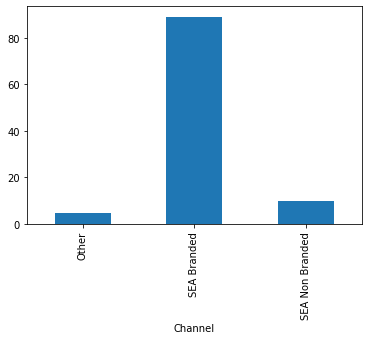

In [168]:
def divide_two_cols(df_sub):
    df_sub['ROAS'] = float(df_sub['SalesValue'].sum()) / float(df_sub['AdSpend_Scaled'].sum())
    return df_sub

df_adspend_scaled_new_customers = df_adspend_scaled_new_customers.groupby('Channel').apply(divide_two_cols)
df_adspend_scaled_new_customers.groupby(['Channel'])['ROAS'].agg('min').plot.bar()

# Divide Sales Value by Ad Spend for each Channel, and plot (existing customers)

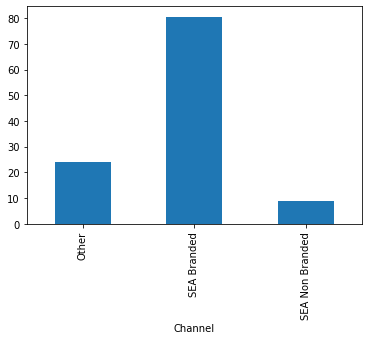

In [169]:
df_adspend_scaled_existing_customers = df_adspend_scaled_existing_customers.groupby('Channel').apply(divide_two_cols)
df_adspend_scaled_existing_customers.groupby(['Channel'])['ROAS'].agg('min').plot.bar()

# Plot New vs Exising ROAS together 

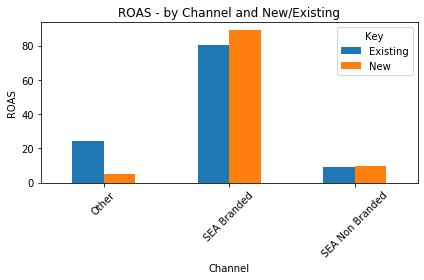

In [239]:
df_adspend_scaled_new_customers['Key'] = 'New'
df_adspend_scaled_existing_customers['Key'] = 'Existing'
df_new_and_existing_adspend_scaled = pd.concat([df_adspend_scaled_new_customers, df_adspend_scaled_existing_customers],keys=['New','Existing'])
df_adspend_scaled_grouped_all = df_new_and_existing_adspend_scaled.groupby(['Channel', 'Key'])['ROAS'].agg('min')
df_adspend_scaled_grouped_all.head()
df_plotting = df_adspend_scaled_grouped_all.unstack('Key').plot(kind = 'bar')

plt.title("ROAS - by Channel and New/Existing")
df_plotting.set_ylabel("ROAS")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(r'C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\ROAS.png', dpi=900)


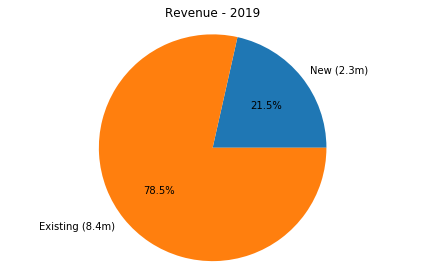

In [215]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New (2.3m)', 'Existing (8.4m)'
sizes = [2.3, 8.4]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_tight_layout(True)

plt.title("Revenue - 2019")
plt.savefig(r'C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\new_existing_revenue.png', dpi=900)
plt.show()


New Customer Orders in 2019
Number of orderlines:  22829
Number of customers:  4291
Total Sales from customers:  2290870.0
AOLV: 100.0
Revenue per customer: 534.0

Existing Customer Orders in 2019
Number of orderlines:  90534
Number of customers:  2735
Total Sales from customers:  8431690.0
AOLV: 93.0
Revenue per customer: 3083.0

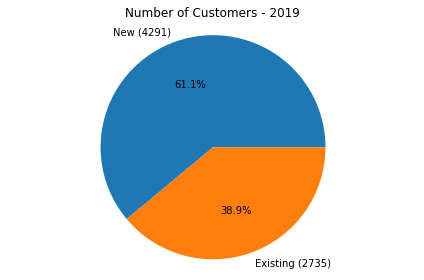

In [216]:
labels = 'New (4291)', 'Existing (2735)'
sizes = [4291, 2735]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_tight_layout(True)
plt.title("Number of Customers - 2019")
plt.savefig(r'C:\Users\Shaheen.Ahmed\Documents\Webshop analysis\new_existing_customers.png', dpi=900)

plt.show()